In [255]:
# MinMaxScalerを使って手動でデータ正規化をするver

In [240]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sons

In [241]:
# csv読み込み
data = pd.read_csv('./prefecture.csv', index_col=0)
data

visitor  travel_consumption  popular_rank  popular_score
prefecture                                                          
北海道           19171             1147180             1           54.2
青森県            2808              179971            17           15.8
岩手県            3881              167458            36           10.3
宮城県            7185              314328            14           16.8
秋田県            2875              148133            19           14.9
山形県            3379              170094            37           10.0
福島県            6515              244859            39            9.2
茨城県            3999              147963            47            7.7
栃木県            8646              300468            46            7.8
群馬県            7049              272700            45            8.5
埼玉県            4714              149284            39            9.2
千葉県           15613              803936            20           14.4
東京都           29053             1747011             3           35.1
神奈川県          12408              552587             5           30.2
山梨県            4888              189021            30           11.7
新潟県            8737              351569            35           10.5
富山県            3021              136701            18           15.4
石川県            6440              341497             9           23.3
長野県           14309              652754             8           24.0
福井県            3125              129290            41            9.1
岐阜県            5366              217494            42            9.0
静岡県           15289              583851            12           17.6
愛知県            9911              374122            13           17.2
三重県            7261              303567            26           12.6
滋賀県            3193              101990            33           10.9
京都府            9298              551901             2           46.3
大阪府           14846              820357             7           24.1
兵庫県           11684              494772            16           16.3
奈良県            2244               97814             6           28.7
和歌山県           3967              192153            28           12.0
鳥取県            2578              112391            42            9.0
島根県            3465              191660            27           12.4
岡山県            4060              265253            31           11.4
広島県            6839              350632            23           14.0
山口県            3016              149843            32           11.3
徳島県            1985               91978            44            8.6
香川県            3559              189772            34           10.8
愛媛県            4171              176870            25           13.1
高知県            3203              128017            29           11.9
福岡県            9652              524863            10           21.4
佐賀県            1328               74858            38            9.4
長崎県            4391              251416            11           20.0
熊本県            5383              220999            21           14.2
大分県            4797              218816            15           16.5
宮崎県            2089               99452            24           13.4
鹿児島県           3992              246093            21           14.2
沖縄県            7321              760427             4           32.7

In [242]:
# 説明変数
x = data[['visitor', 'popular_score']]

# 目的変数
# 重回帰ではそれぞれの説明変数の傾きが出るのでxとデータ次元を合わせる
y = data[['travel_consumption']]

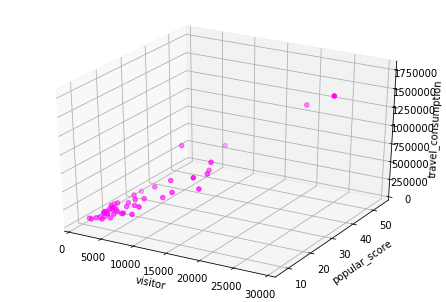

In [243]:
# xとyを3Dグラフで表示
x1 = data[['visitor']]
x2 = data[['popular_score']]

fig = plt.figure()
ax = Axes3D(fig)

# colorでプロットする点（実績値）の色を指定する
ax.scatter3D(x1, x2, y, color='magenta')
ax.set_xlabel("visitor")
ax.set_ylabel("popular_score")
ax.set_zlabel("travel_consumption")

plt.show()

In [244]:
# データ正規化（平均値：0、-1～1の値で平均からどれくらい離れているかを表す）
scaler = preprocessing.MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)
scaler.fit(y)
y = scaler.transform(y)

df_x = pd.DataFrame(x)
df_x.columns = ['visitor', 'popular_score']
df_y = pd.DataFrame(y)
df_y.columns = ['travel_consumption']
pd.concat([df_x, df_y], axis=1)

visitor  popular_score  travel_consumption
0   0.643571       1.000000            0.641282
1   0.053381       0.174194            0.062861
2   0.092083       0.055914            0.055378
3   0.211253       0.195699            0.143211
4   0.055798       0.154839            0.043821
5   0.073977       0.049462            0.056954
6   0.187087       0.032258            0.101666
7   0.096339       0.000000            0.043719
8   0.263950       0.002151            0.134922
9   0.206348       0.017204            0.118316
10  0.122128       0.032258            0.044509
11  0.515239       0.144086            0.436012
12  1.000000       0.589247            1.000000
13  0.399639       0.483871            0.285697
14  0.128404       0.086022            0.068273
15  0.267232       0.060215            0.165482
16  0.061064       0.165591            0.036984
17  0.184382       0.335484            0.159458
18  0.468206       0.350538            0.345600
19  0.064815       0.030108            0.032552
20  0.145645       0.027957            0.085301
21  0.503553       0.212903            0.304394
22  0.309576       0.204301            0.178969
23  0.213995       0.105376            0.136775
24  0.067268       0.068817            0.016226
25  0.287466       0.830108            0.285287
26  0.487574       0.352688            0.445832
27  0.373526       0.184946            0.251122
28  0.033039       0.451613            0.013728
29  0.095185       0.092473            0.070146
30  0.045086       0.027957            0.022446
31  0.077078       0.101075            0.069851
32  0.098539       0.079570            0.113862
33  0.198774       0.135484            0.164922
34  0.060884       0.077419            0.044843
35  0.023697       0.019355            0.010238
36  0.080469       0.066667            0.068722
37  0.102543       0.116129            0.061006
38  0.067628       0.090323            0.031791
39  0.300234       0.294624            0.269117
40  0.000000       0.036559            0.000000
41  0.110478       0.264516            0.105587
42  0.146258       0.139785            0.087397
43  0.125122       0.189247            0.086091
44  0.027448       0.122581            0.014708
45  0.096087       0.139785            0.102404
46  0.216159       0.537634            0.409992

In [245]:
# 学習データ、テストデータを分ける（test_sizeでテストデータの割合を決める）
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

In [246]:
# 回帰分析モデル作成
model = LinearRegression()

In [247]:
# 学習データで学習を実行
model.fit(X_train, Y_train)
print('*' * 50)
print('学習結果')
print('*' * 50)
print('直線の傾き：{}'.format(model.coef_))
print('切片：{}'.format(model.intercept_))

**************************************************
学習結果
**************************************************
直線の傾き：[[0.79303507 0.19917808]]
切片：[-0.03495334]


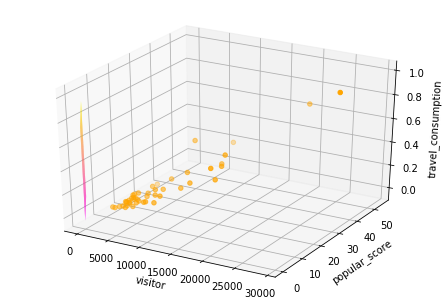

In [248]:
# 学習結果をグラフにする
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter3D(x1, x2, y, color='orange')
ax.set_xlabel("visitor")
ax.set_ylabel("popular_score")
ax.set_zlabel("travel_consumption")

# 正規化したデータをプロット
x1 = df_x[['visitor']]
x2 = df_x[['popular_score']]
y = df_y[['travel_consumption']]

# x1,x2はDataFrameなので[0]のようにアクセスする
# mesh_x1は最小値から最大値までの数値を一定の間隔で保持している
# np.arange(visitor min値, visitor max値, ステップ数)
mesh_x1 = np.arange(x1.min()[0], x1.max()[0], 0.001)
mesh_x2 = np.arange(x2.min()[0], x2.max()[0], 0.001)

# x1,x2の座標
mesh_x1, mesh_x2 = np.meshgrid(mesh_x1, mesh_x2)

# (x1の直線の傾き * x1実績値) + (x2の直線の傾き * x2実績値) + 切片
mesh_y = model.coef_[0][0] * mesh_x1 + model.coef_[0][1] * mesh_x2 + model.intercept_[0]

# cmapでグラフのカラーが変更できる
ax.plot_surface(mesh_x1, mesh_x2, mesh_y, cmap='spring')

# 網掛がうまく表示できない（値が小さいから？）
plt.show()

In [249]:
# テストデータで予測を実行
result_pred = model.predict(X_test)

# 正規化された予測値を元に戻す
result_pred = scaler.inverse_transform(result_pred)
result_pred

array([[210635.08275401],
       [325123.40801143],
       [ 85508.93742221],
       [141973.07768485],
       [754035.59797672],
       [747645.41831118],
       [256915.99363814],
       [152286.30025654],
       [494975.97194374],
       [189105.48726717]])

In [250]:
# travel_consumptionの正解値と予測値を表示する

# result_predは二次元配列なので一次元配列にする
result_pred = [result for inner in result_pred for result in inner]
result_pred

[210635.082754015,
 325123.40801143006,
 85508.93742221396,
 141973.07768485066,
 754035.5979767236,
 747645.4183111772,
 256915.993638138,
 152286.30025653934,
 494975.9719437417,
 189105.48726716774]

In [251]:
# 正規化されたX_testを元に戻す
X_test = scaler.inverse_transform(X_test)
X_test

array([[130103.88450857, 830023.87096774],
       [407237.98856628, 301407.76129032],
       [150248.12623986, 121606.36344086],
       [168160.82023445, 333772.01290323],
       [857769.38297565, 661010.55698925],
       [936416.36266907, 315791.87311828],
       [319423.56952209, 308599.8172043 ],
       [203744.95981966, 243871.31397849],
       [592516.76281335, 416480.65591398],
       [279074.77395852, 128798.41935484]])

In [252]:
# 正規化されたY_testを元に戻す
Y_test = scaler.inverse_transform(Y_test)
Y_test

array([[ 97814.],
       [350632.],
       [112391.],
       [148133.],
       [652754.],
       [803936.],
       [220999.],
       [191660.],
       [374122.],
       [149284.]])

In [253]:
# Y_testは二次元配列なので一次元配列にする
Y_test_1d = [data for inner in Y_test for data in inner]

# DataFrameを作成する
df_result = pd.DataFrame(np.array([Y_test_1d, result_pred]).T)
# カラム名を追加
df_result.columns = ['正解値', '予測値']

print('*' * 50)
print('予測結果')
print('*' * 50)
df_result

**************************************************
予測結果
**************************************************


正解値            予測値
0   97814.0  210635.082754
1  350632.0  325123.408011
2  112391.0   85508.937422
3  148133.0  141973.077685
4  652754.0  754035.597977
5  803936.0  747645.418311
6  220999.0  256915.993638
7  191660.0  152286.300257
8  374122.0  494975.971944
9  149284.0  189105.487267

In [254]:
# 予測精度
score_pred = model.score(X_test, Y_test)
print('*' * 50)
print('予測精度')
print('*' * 50)
print(score_pred)

**************************************************
予測精度
**************************************************
0.7910241720100144
